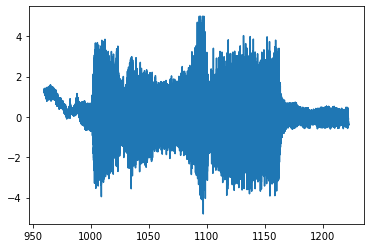

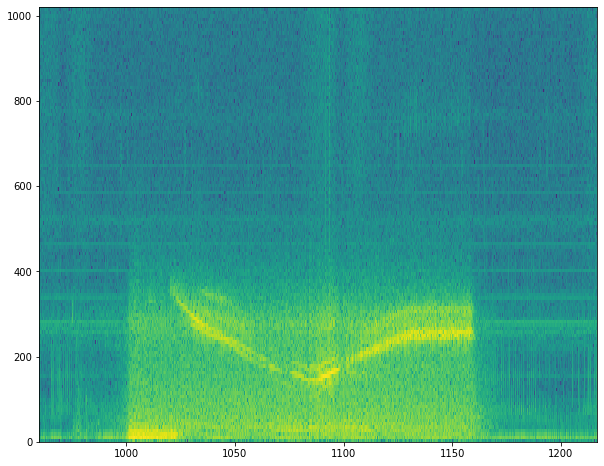

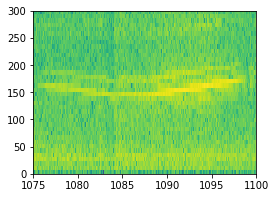

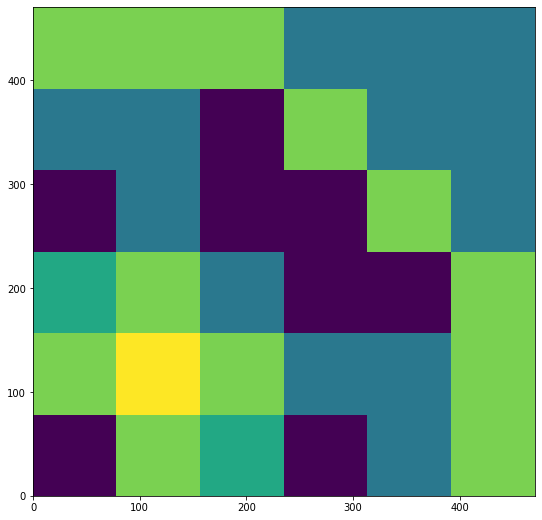

In [13]:
import scipy.io as sio
import math
import matplotlib.pyplot as plot
import numpy as np
from scipy import signal
from numpy.fft import fft, fftfreq, fftshift

data = np.genfromtxt(fname='38976_TJ-II_Mirnov_coil.txt')
plot.figure(1)
plot.plot(data[:,0],data[:,1])
Fs = 1.0/(data[2,0]-data[1,0])
f, t, Sxx = signal.spectrogram(data[:,1], fs=Fs) # Строим спектрограмму сигнала
Sxx = np.log(Sxx)
plot.figure(2,figsize=(10,8))
plot.pcolormesh(t+data[0,0], f, Sxx)
plot.figure(3,figsize=(4,3))
plot.pcolormesh(t+data[0,0], f, Sxx)
axes = plot.gca()
axes.set_xlim([1075,1100])
axes.set_ylim([0,300])
s1=data[1074:1100,1]
s2=data[1074:1100,1]
rate=Fs

def compute_bicoherence(s1, s2, rate, nperseg=26, noverlap=13):
    # compute the stft
    f1, t1, spec_s1 = signal.spectrogram(s1, fs = rate, nperseg = nperseg, noverlap = noverlap)
    spec_s1 = np.log(spec_s1)
    f2, t2, spec_s2 = signal.spectrogram(s2, fs = rate, nperseg = nperseg, noverlap = noverlap)
    spec_s2 = np.log(spec_s2)

    #transpose (f, t) -> (t, f)
    spec_s1 = np.transpose(spec_s1, [1, 0])
    spec_s2 = np.transpose(spec_s2, [1, 0])
    
    # compute the bicoherence
    arg = np.arange(f1.size//2)
    sumarg = arg[:, None] + arg[None, :]
    num = np.abs(np.mean(spec_s1[:, arg, None] * spec_s1[:, None, arg] * np.conjugate(spec_s2[:, sumarg]), axis = 0)) ** 2
    denum = np.mean(np.abs(spec_s1[:, arg, None] * spec_s1[:, None, arg]) ** 2, axis = 0) * np.mean(np.abs(np.conjugate(spec_s2[:, sumarg])) ** 2, axis = 0)
    bicoh = num / denum
    return f1[arg], bicoh


freqs, bicoh = compute_bicoherence(s1, s2, rate)
plot.figure(figsize = (9, 9))
plot.pcolormesh(freqs, freqs, -bicoh)


NameError: name 'arg' is not defined

NameError: name 'arg' is not defined